## Preprocessing

In [1]:
import json

with open("F:\\Fatemeh\\Education\\Master\\Semester2\\NLP\\Natural-Language-Processing-Projects\\MultimodalRAG\\scientists_data\\scintists_data_after.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print(data)

[{'name': 'زرتشت', 'sex': 'مرد', 'nick-names': ['زردشت', 'زراتشت', 'سپیتمان زرتشت', 'زرتشت سپیتمه'], 'birth': {'date': 'حدود 1700 سال پیش از هجرت', 'location': {'province': 'شمال شرق ایران', 'city': '', 'coordinates': {'latitude': 0.0, 'longitude': 0.0}}}, 'death': {'date': '77 سالگی', 'location': {'province': '', 'city': '', 'coordinates': {'latitude': 0.0, 'longitude': 0.0}}, 'tomb_location': {'province': 'ایران', 'city': 'ری', 'coordinates': {'latitude': 0.0, 'longitude': 0.0}}}, 'era': 'دوران باستان', 'occupation': ['رهبر دینی', 'فیلسوف', 'شاعر'], 'works': ['گاتاها', 'فروردینیشت', 'یسنه'], 'events': [{'title': 'دیدار با ویشتاسپ', 'start_date': 'حدود 1700 پیش از هجرت', 'end_date': '', 'location': {'province': 'شمال شرق ایران', 'city': '', 'coordinates': {'latitude': 0.0, 'longitude': 0.0}}, 'related_people': ['ویشتاسپ'], 'description': 'زرتشت با درمان معجزه\u200cآسای اسب پادشاه، ویشتاسپ را به پذیرش دین مزدیسنا ترغیب کرد.'}, {'title': 'تدوین آموزه\u200cهای فلسفی', 'start_date': 'حدود

### Download Image

In [2]:
import requests
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def download_image(image_url, save_path=None):
    if "fa.wikipedia.org" in image_url:
        response = requests.get(image_url)
        soup = BeautifulSoup(response.text, "html.parser")
        div = soup.find("div", class_="fullImageLink", id="file")
        if div:
            a_tag = div.find("a")
            if a_tag:
                href = a_tag.get("href")
                image_url = urljoin("https:", href) if href.startswith("//") else href
    
    headers = {"User-Agent": "ImageDatasetScript/1.0 (email@gmail.com)"}
    response = requests.get(image_url, headers=headers)
    if response.status_code == 200:
        if save_path:
            with open(save_path, "wb") as f:
                f.write(response.content)
        return Image.open(BytesIO(response.content)).convert("RGB") , image_url
    else:
        print(f"Failed to download image from {image_url}")

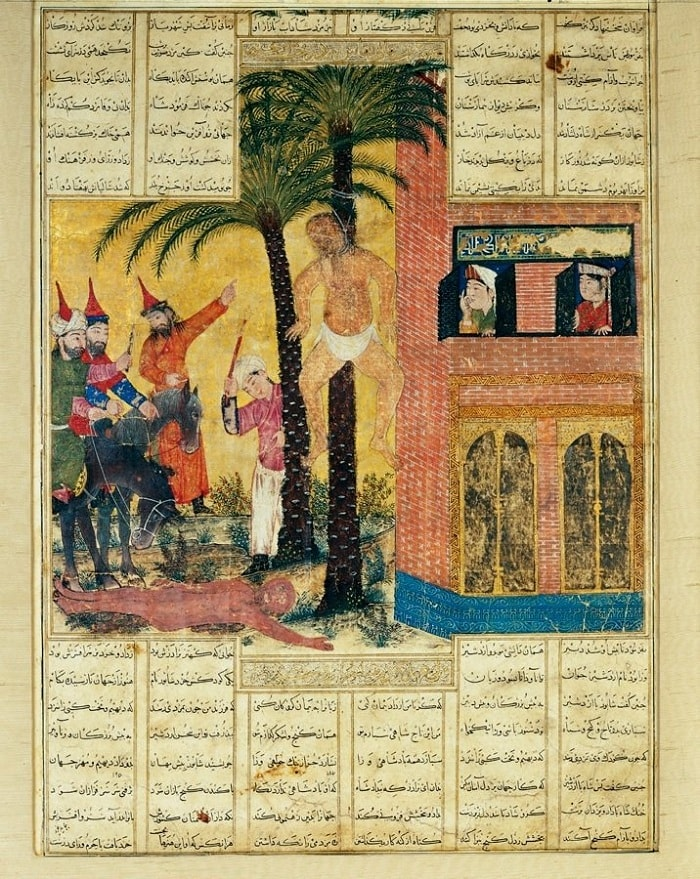

In [3]:
url = "https://fa.wikipedia.org/wiki/%D9%BE%D8%B1%D9%88%D9%86%D8%AF%D9%87:Mani_execution_shahnameh.jpg"
download_image(url, "F:\\Fatemeh\\Education\\Master\\Semester2\\NLP\\Natural-Language-Processing-Projects\\MultimodalRAG\\scientists_data\\image.jpg")

### Image Encoder

In [ ]:
from transformers import CLIPVisionModel, RobertaModel, AutoTokenizer, CLIPImageProcessor
from PIL import Image
import torch.nn.functional as F

# 1. Load model & preprocessors
vision_encoder = CLIPVisionModel.from_pretrained('SajjadAyoubi/clip-fa-vision')
preprocessor = CLIPImageProcessor.from_pretrained('SajjadAyoubi/clip-fa-vision')
text_encoder = RobertaModel.from_pretrained('SajjadAyoubi/clip-fa-text')
tokenizer = AutoTokenizer.from_pretrained('SajjadAyoubi/clip-fa-text')


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Error while downloading from https://huggingface.co/SajjadAyoubi/clip-fa-text/resolve/main/pytorch_model.bin: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Text embedding shape: torch.Size([1, 768])
Image embedding shape: torch.Size([1, 768])
Text embedding (first 5 dims): tensor([ 0.4493, -0.4297,  0.3260, -0.5170,  0.5610], grad_fn=<SliceBackward0>)
Image embedding (first 5 dims): tensor([ 0.0013, -0.1360, -0.4029, -0.0036, -0.5256], grad_fn=<SliceBackward0>)
Cosine similarity: -0.027137020602822304


In [12]:
# 2. Define input
text = "شاعر"
img = "F:\\Fatemeh\\Education\\Master\\Semester2\\NLP\\Natural-Language-Processing-Projects\\MultimodalRAG\\scientists_data\\images.jpg"
image = Image.open(img).convert("RGB")

# 3. Compute text embedding
text_inputs = tokenizer(text, return_tensors="pt")
text_embedding = text_encoder(**text_inputs).pooler_output  # shape: [1, hidden_dim]

# 4. Compute image embedding
image_inputs = preprocessor(image, return_tensors="pt")
image_embedding = vision_encoder(**image_inputs).pooler_output  # shape: [1, hidden_dim]

# 5. Check shape & values
print("Text embedding shape:", text_embedding.shape)
print("Image embedding shape:", image_embedding.shape)

# 6. Check first 5 values for inspection
print("Text embedding (first 5 dims):", text_embedding[0][:5])
print("Image embedding (first 5 dims):", image_embedding[0][:5])

# 7. Optional: Compute cosine similarity between text & image embeddings
cos_sim = F.cosine_similarity(text_embedding, image_embedding)
print("Cosine similarity:", cos_sim.item())


Text embedding shape: torch.Size([1, 768])
Image embedding shape: torch.Size([1, 768])
Text embedding (first 5 dims): tensor([ 0.2059,  0.2780,  0.0110, -0.5699,  0.2516], grad_fn=<SliceBackward0>)
Image embedding (first 5 dims): tensor([0.9656, 0.7837, 0.0828, 0.2298, 1.6497], grad_fn=<SliceBackward0>)
Cosine similarity: 0.3080052137374878


In [17]:
import os
import numpy as np
import torch


image_folder = "F:\\Fatemeh\\Education\\Master\\Semester2\\NLP\\Natural-Language-Processing-Projects\\MultimodalRAG\\scientists_data"  # change to your folder path
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))]

# Compute embeddings
embeddings = []
for file in image_files:
    img = Image.open(file).convert("RGB")
    inputs = preprocessor(images=img, return_tensors="pt")
    with torch.no_grad():
        emb = vision_encoder(**inputs).pooler_output  # shape (1, hidden_dim)
    embeddings.append(emb.squeeze(0))
    
embeddings = torch.stack(embeddings)  # shape (n_images, hidden_dim)

embeddings = F.normalize(embeddings, p=2, dim=1)

# compute cosine similarity matrix
sim_matrix = torch.matmul(embeddings, embeddings.T)

# Show top similar pairs
n = len(image_files)
for i in range(n):
    for j in range(i + 1, n):
        print(f"{os.path.basename(image_files[i])} <-> {os.path.basename(image_files[j])}: similarity={sim_matrix[i, j]:.4f}")

ferdosi.jpg <-> gol.jpg: similarity=0.0035
ferdosi.jpg <-> mani.jpg: similarity=0.5028
ferdosi.jpg <-> pictureShahname.jpg: similarity=0.2555
ferdosi.jpg <-> shahnameBook.jpg: similarity=0.5097
ferdosi.jpg <-> tree.jpg: similarity=0.1989
gol.jpg <-> mani.jpg: similarity=0.0237
gol.jpg <-> pictureShahname.jpg: similarity=0.1344
gol.jpg <-> shahnameBook.jpg: similarity=0.1049
gol.jpg <-> tree.jpg: similarity=0.0977
mani.jpg <-> pictureShahname.jpg: similarity=0.7492
mani.jpg <-> shahnameBook.jpg: similarity=0.3554
mani.jpg <-> tree.jpg: similarity=0.1586
pictureShahname.jpg <-> shahnameBook.jpg: similarity=0.2717
pictureShahname.jpg <-> tree.jpg: similarity=0.1469
shahnameBook.jpg <-> tree.jpg: similarity=0.2572


In [28]:
def clip_encode(image):
    if type(image) == str:
        image = Image.open(image).convert("RGB")
    image_inputs = preprocessor(image, return_tensors="pt")
    image_embedding = vision_encoder(**image_inputs).pooler_output  # shape: [1, hidden_dim]
    return  image_embedding.squeeze(0)

In [30]:
embed1 = clip_encode("F:\\Fatemeh\\Education\\Master\\Semester2\\NLP\\Natural-Language-Processing-Projects\\MultimodalRAG\\scientists_data\\ferdosi.jpg")
embed2 = clip_encode("F:\\Fatemeh\\Education\\Master\\Semester2\\NLP\\Natural-Language-Processing-Projects\\MultimodalRAG\\scientists_data\\mani.jpg")

cos_sim = torch.dot(embed1, embed2) / (embed1.norm() * embed2.norm())
print("Cosine similarity:", cos_sim.item())

Cosine similarity: 0.5028354525566101


### Save in Vector Databse

In [18]:
import os
import chromadb

persist_dir = "chroma_image_db"
os.makedirs(persist_dir, exist_ok=True)

client = chromadb.PersistentClient(path=persist_dir)

collection = client.get_or_create_collection(
    name="image_embeddings",
    metadata={"hnsw:space": "cosine"}  # cosine similarity for embeddings
)

In [37]:
import numpy as np

for record in data[1:]:
    name = record["name"]
    print(f"--------Images for {name}---------")

    for idx, (caption, url) in enumerate(record["image"].items()):

        if not url:
            continue

        try: 
            record_id = f"{name}_img_{idx}"
            existing = collection.get(ids=[record_id])
            if len(existing['ids']) == 0:
                img, url = download_image(url)
                embedding = clip_encode(img)
                collection.add(
                    ids=[record_id],
                    embeddings=[embedding.tolist()],
                    metadatas=[{"caption": caption, "url": url, "name": name}],
                    documents=[caption]  # document text can be same as caption
                )
            else:
                print(f" '{record_id}' , already exists")
                continue

            print(f"✅ Added: {caption}")

        except Exception as e:
            print(f"❌ Failed for {url}: {e}")
            break

    # print("💾 All images processed and stored in Chroma!)

✅ Added: adult
✅ Added: سردیس بزرگمهر در اصفهان
✅ Added: adult
✅ Added: طومارنگاره زادنگاره مانی     موزه کیوشو، ژاپن
✅ Added: طومارنگاره سه گذرگاه     موزه یاماتو بونکاکا ـ ژاپن. به معنی سه مکان باززایش یا گذرگاه. این سه مکان شِخینا یا عرش اعلاء، ارض خاکی و دوزخ هستند. صحنههای این پرده به پنج بخش تقسیم میشوند، نخست دیدار دوشیزة روشنی از بهشت، دوم موعظه در اطراف یک ایزد احتمالاً خود مانی، سوم باززایی نیکو یا چهار گروه در اجتماع چین. چهارم، به پیشنهاد دانشمندان، این بخش از تصویر حاوی نقشی از دوشیزة روشنی است که در روز داوری برای ارواح درگذشتگان شفاعت میکند. در اینجا داور در محکمة خود نشستهاست. 
✅ Added: سکهای منقش به چهرهٔ شاپور یکم، پادشاهی که به مانی اجازه تبلیغ دین داد و در دربار پذیرفت.
✅ Added: هرمز پسر شاپور که در زمان شاهی یکساله اش مانی در امان بود
✅ Added: بهرام یکم پسر شاپور که فرمان به حبس مانی داد و مانی در زمان او درگذشت.
✅ Added: نمایشگاه راز مانی در موزه چستر بیتی، دوبلین، ۲۰۱۹
✅ Added: بردارکشیدن مانی نگارگری شاهنامه
✅ Added: نقاش مانی با پادشاه بورامام گور بهرام که نقاش

In [34]:
record = collection.get(ids=["زرتشت_img_5"])
print(record)

{'ids': ['زرتشت_img_5'], 'embeddings': None, 'documents': ['بخشی از نقاشی مکتب آتن اثر رافائل. شخص سمت چپ احتمالاً زرتشت را نشان میدهد.'], 'uris': None, 'included': ['metadatas', 'documents'], 'data': None, 'metadatas': [{'url': 'https://upload.wikimedia.org/wikipedia/commons/6/68/Sanzio_01_Zoroaster_Ptolmey.jpg', 'caption': 'بخشی از نقاشی مکتب آتن اثر رافائل. شخص سمت چپ احتمالاً زرتشت را نشان میدهد.', 'name': 'زرتشت'}]}


In [35]:
records = collection.get(ids=["زرتشت_img_5"], include=["embeddings"])
print(records["embeddings"][0][:10])  

[ 0.5765624   0.13898081 -0.38802955  0.3228119   1.0269047  -0.50792897
  0.01836779 -0.9216224   0.66271287  0.14217286]


In [41]:
records = collection.get()
print("IDs:", records["ids"])

IDs: ['زرتشت_img_1', 'زرتشت_img_3', 'زرتشت_img_4', 'زرتشت_img_5', 'زرتشت_img_6', 'زرتشت_img_7', 'زرتشت_img_8', 'زرتشت_img_9', 'زرتشت_img_10', 'زرتشت_img_11', 'زرتشت_img_12', 'زرتشت_img_13', 'زرتشت_img_14', 'زرتشت_img_15', 'زرتشت_img_16', 'زرتشت_img_17', 'زرتشت_img_18', 'زرتشت_img_19', 'بزرگمهر _img_1', 'بزرگمهر _img_3', 'مانی_img_1', 'مانی_img_3', 'مانی_img_4', 'مانی_img_5', 'مانی_img_6', 'مانی_img_7', 'مانی_img_8', 'مانی_img_9', 'مانی_img_10', 'جاماسپ_img_1', 'جاماسپ_img_2', 'جاماسپ_img_3', 'برزویه_img_1', 'فریدون_img_3', 'فریدون_img_4', 'فریدون_img_5', 'فریدون_img_6', 'فریدون_img_7', 'فریدون_img_8', 'فریدون_img_9', 'فریدون_img_10', 'فریدون_img_11', 'مزدک بامدادان_img_3', 'مزدک بامدادان_img_4', 'مزدک بامدادان_img_5', 'مزدک بامدادان_img_6', 'کرتیر_img_1', 'کرتیر_img_3', 'کرتیر_img_4', 'کرتیر_img_5', 'کرتیر_img_6', 'کرتیر_img_7', 'کرتیر_img_8', 'نَرْسه_img_3', 'نَرْسه_img_4', 'نَرْسه_img_5', 'نَرْسه_img_6', 'نَرْسه_img_7', 'نَرْسه_img_8', 'مهرداد ششم_img_1', 'مهرداد ششم_img_3', 'فِرِیدو

In [43]:
len(records["ids"])

425

In [44]:
record = collection.get(ids=["مهتاب مستعان_img_3"])
record

{'ids': ['مهتاب مستعان_img_3'],
 'embeddings': None,
 'documents': ['پژواک جهان ۱۳۶۸ اثر محمد احصایی؛ موزه هنرهای معاصر تهران.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'name': 'مهتاب مستعان',
   'url': 'https://upload.wikimedia.org/wikipedia/fa/7/74/Ehsai_1990.PNG',
   'caption': 'پژواک جهان ۱۳۶۸ اثر محمد احصایی؛ موزه هنرهای معاصر تهران.'}]}